In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
vih = pd.read_csv("vih.csv")


In [14]:
vih.head()

,Country,Reported number of people receiving ART,Estimated number of people living with HIV,Estimated ART coverage among people living with HIV (%),Estimated number of people living with HIV_median,Estimated number of people living with HIV_min,Estimated number of people living with HIV_max,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,Afghanistan,920,7200[4100–11000],13[7–20],7200.0,4100.0,11000.0,13.0,7.0,20.0,Eastern Mediterranean
1,Albania,580,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,12800,16000[15000–17000],81[75–86],16000.0,15000.0,17000.0,81.0,75.0,86.0,Africa
3,Angola,88700,330000[290000–390000],27[23–31],330000.0,290000.0,390000.0,27.0,23.0,31.0,Africa
4,Argentina,85500,140000[130000–150000],61[55–67],140000.0,130000.0,150000.0,61.0,55.0,67.0,Americas


In [20]:
vih.shape

(170, 11)

In [19]:
vih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         170 non-null    object 
 1   Reported number of people receiving ART                         170 non-null    object 
 2   Estimated number of people living with HIV                      170 non-null    object 
 3   Estimated ART coverage among people living with HIV (%)         170 non-null    object 
 4   Estimated number of people living with HIV_median               138 non-null    float64
 5   Estimated number of people living with HIV_min                  138 non-null    float64
 6   Estimated number of people living with HIV_max                  138 non-null    float64
 7   Estimated ART coverage among people living with HIV (

In [23]:
vih.isnull().sum()

Country                                                            0
Reported number of people receiving ART                            0
Estimated number of people living with HIV                         0
Estimated ART coverage among people living with HIV (%)            0
Estimated number of people living with HIV_median                 32
Estimated number of people living with HIV_min                    32
Estimated number of people living with HIV_max                    32
Estimated ART coverage among people living with HIV (%)_median    34
Estimated ART coverage among people living with HIV (%)_min       34
Estimated ART coverage among people living with HIV (%)_max       34
WHO Region                                                         0
dtype: int64

In [24]:
vih.duplicated().sum()

np.int64(0)

In [25]:
vih = vih.dropna(subset=["Estimated number of people living with HIV_median"])


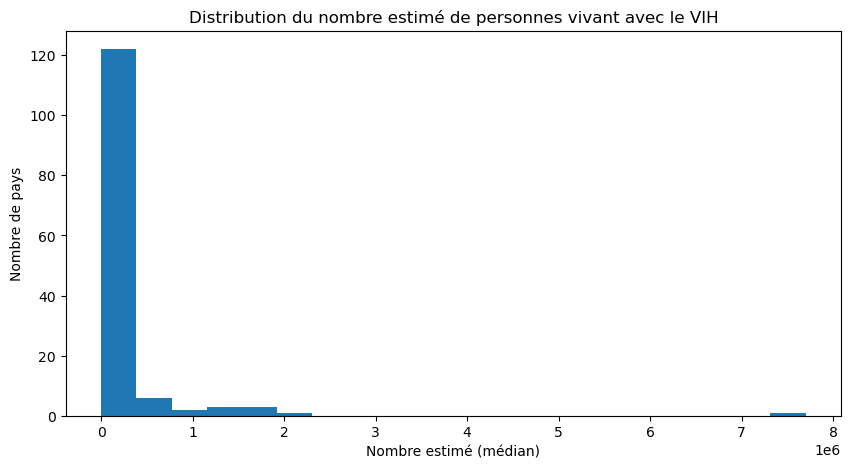

In [26]:
plt.figure(figsize=(10,5))
plt.hist(vih["Estimated number of people living with HIV_median"], bins=20)
plt.title("Distribution du nombre estimé de personnes vivant avec le VIH")
plt.xlabel("Nombre estimé (médian)")
plt.ylabel("Nombre de pays")
plt.show()

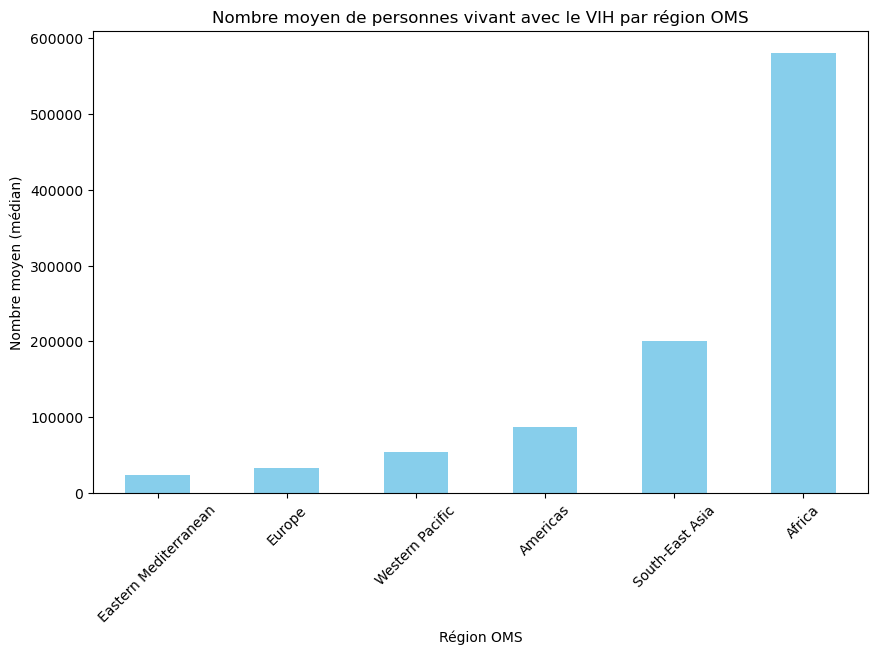

In [27]:
region_stats = vih.groupby("WHO Region")["Estimated number of people living with HIV_median"].mean().sort_values()

plt.figure(figsize=(10,6))
region_stats.plot(kind="bar", color="skyblue")
plt.title("Nombre moyen de personnes vivant avec le VIH par région OMS")
plt.xlabel("Région OMS")
plt.ylabel("Nombre moyen (médian)")
plt.xticks(rotation=45)
plt.show()

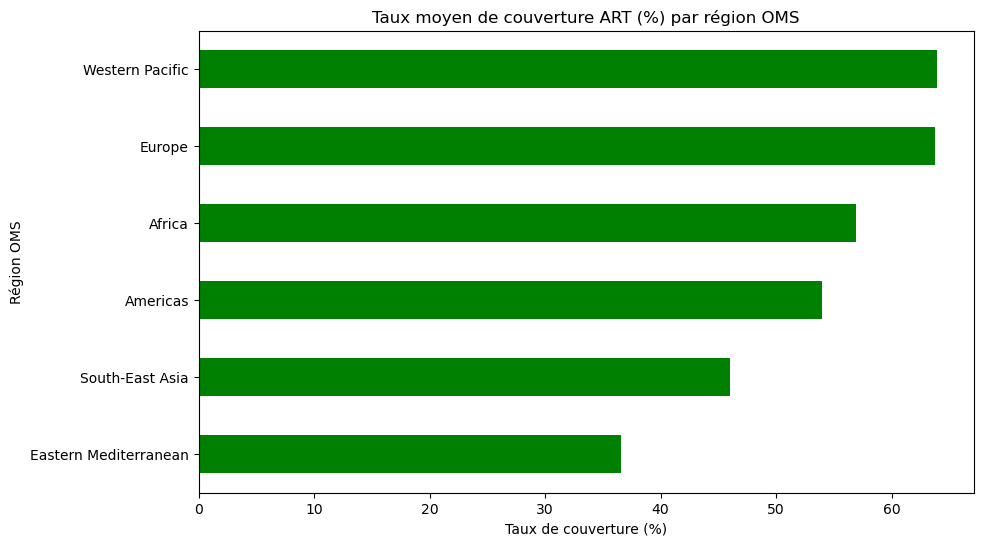

In [28]:
art_region = vih.groupby("WHO Region")["Estimated ART coverage among people living with HIV (%)_median"].mean().sort_values()

plt.figure(figsize=(10,6))
art_region.plot(kind="barh", color="green")
plt.title("Taux moyen de couverture ART (%) par région OMS")
plt.xlabel("Taux de couverture (%)")
plt.ylabel("Région OMS")
plt.show()

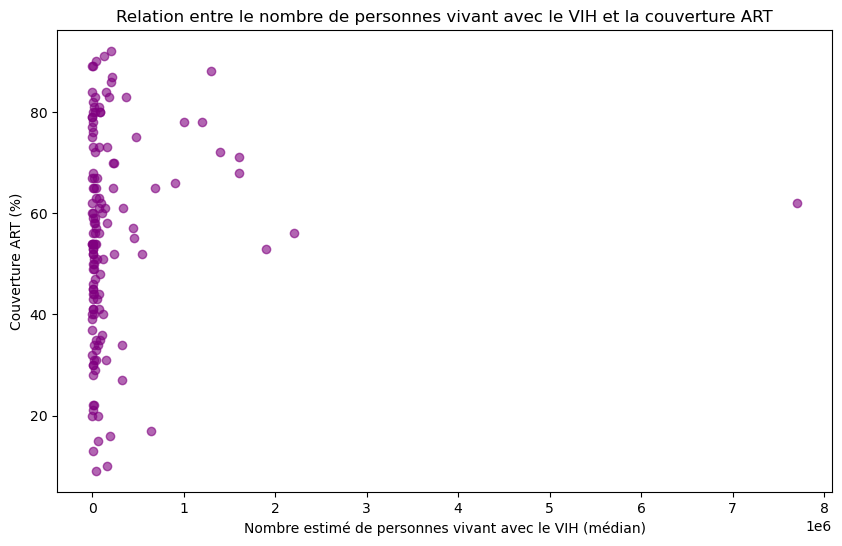

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(vih["Estimated number of people living with HIV_median"], 
            vih["Estimated ART coverage among people living with HIV (%)_median"],
            alpha=0.6, color="purple")

plt.title("Relation entre le nombre de personnes vivant avec le VIH et la couverture ART")
plt.xlabel("Nombre estimé de personnes vivant avec le VIH (médian)")
plt.ylabel("Couverture ART (%)")
plt.show()

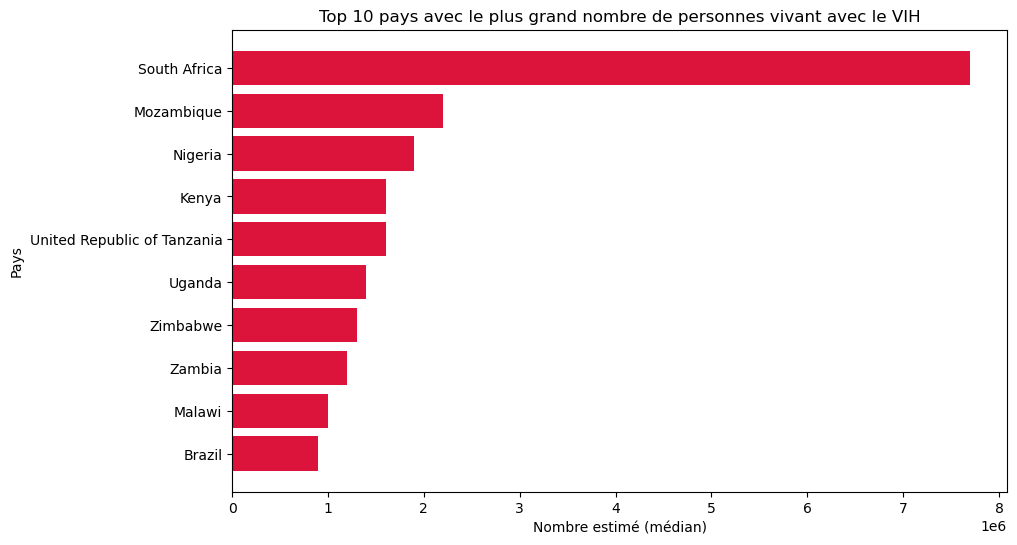

In [30]:
top10 = vih.nlargest(10, "Estimated number of people living with HIV_median")[["Country", "Estimated number of people living with HIV_median"]]

plt.figure(figsize=(10,6))
plt.barh(top10["Country"], top10["Estimated number of people living with HIV_median"], color="crimson")
plt.title("Top 10 pays avec le plus grand nombre de personnes vivant avec le VIH")
plt.xlabel("Nombre estimé (médian)")
plt.ylabel("Pays")
plt.gca().invert_yaxis()
plt.show()